In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.drop(columns='Cabin',inplace=True)
test.drop(columns='Cabin',inplace=True)

In [8]:
train.drop(columns='PassengerId',inplace=True)
test.drop(columns='PassengerId',inplace=True)

In [9]:
train['Family'] = train['Parch'] + train['SibSp'] + 1
test['Family'] = test['Parch'] + test['SibSp'] + 1

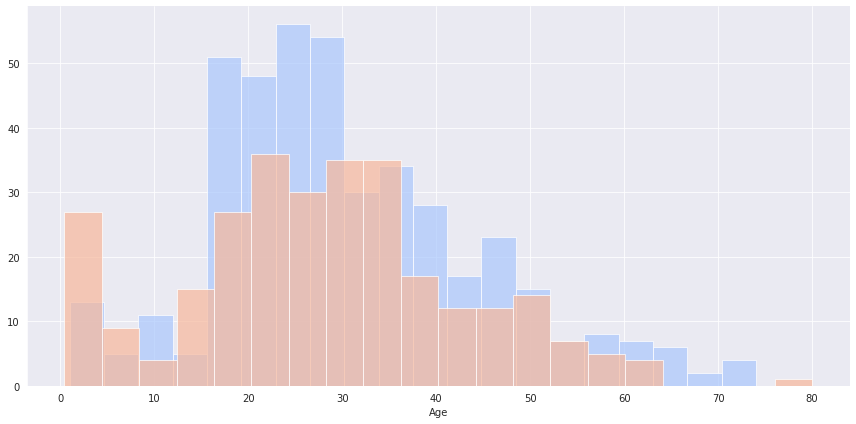

In [10]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data=train, hue='Survived', palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Age', bins=20, alpha=0.7)

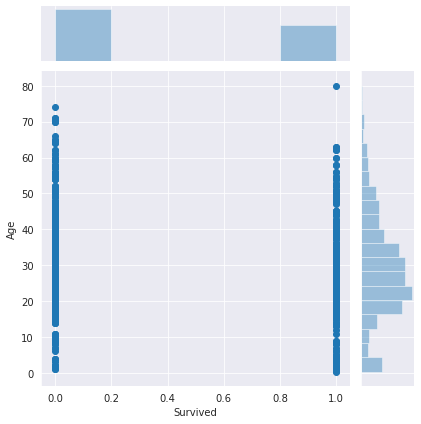

In [11]:
sns.jointplot(x='Survived', y='Age', data=train)

In [12]:
train['Sex'] = train.Sex.map({'male':1 , 'female':0})
test['Sex'] = test.Sex.map({'male':1 , 'female':0})

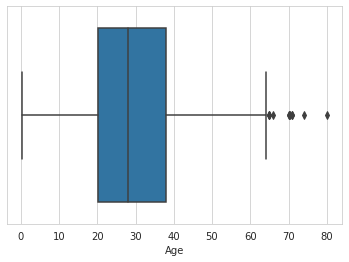

In [13]:
sns.set_style('whitegrid')
ax = sns.boxplot(x=train['Age'])

In [14]:
print(train['Age'].mean())
print(train['Age'].median())
print(train['Age'].mode()[0])

29.69911764705882
28.0
24.0


In [15]:
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

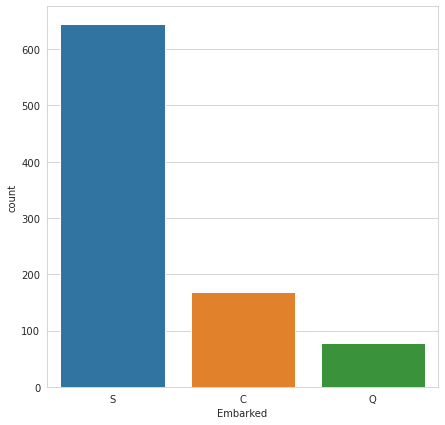

In [16]:
fig , ax1 = plt.subplots(1,1,figsize=(7,7))
sns.countplot(x='Embarked', data=train , ax=ax1)

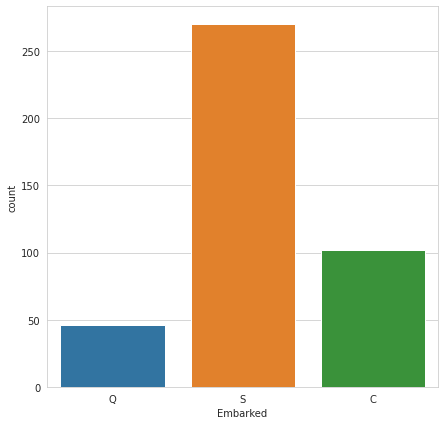

In [17]:
fig , ax1 = plt.subplots(1,1,figsize=(7,7))
sns.countplot(x='Embarked', data=test , ax=ax1)

In [18]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [19]:
Embarked_dummies = pd.get_dummies(train['Embarked'])

In [20]:
Embarked_dummies1 = pd.get_dummies(test['Embarked'])

In [21]:
train = pd.concat([train, Embarked_dummies], axis=1, sort=False)

In [22]:
test = pd.concat([test, Embarked_dummies1], axis=1, sort=False)

In [23]:
train.drop(columns='Embarked',inplace=True)
test.drop(columns='Embarked',inplace=True)

In [24]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Family,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,1,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,0,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,0,0,1


In [25]:
train.drop(columns=['Name','Ticket'],inplace=True)
test.drop(columns=['Name','Ticket'],inplace=True)

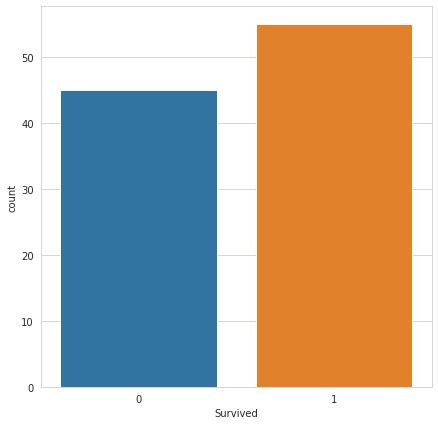

In [26]:
fig , ax1 = plt.subplots(1,1,figsize=(7,7))
sns.countplot(x=train[train['Age']<=16]['Survived'], data=train , ax=ax1)

In [27]:
def isChild(Passenger):
    age = Passenger
    return 1 if age < 16 else 0

train['IsChild'] = train['Age'].apply(isChild)
test['IsChild'] = test['Age'].apply(isChild)

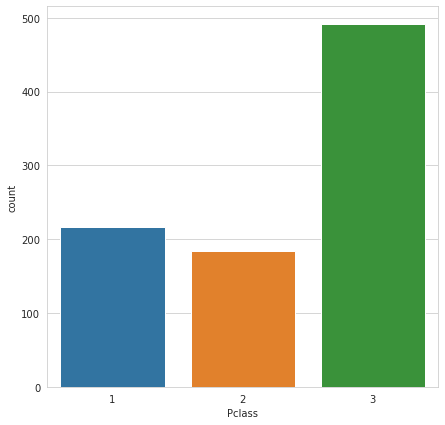

In [28]:
fig , ax1 = plt.subplots(1,1,figsize=(7,7))
sns.countplot(x='Pclass', data=train, ax=ax1)

In [29]:
train.drop(columns=['Parch','SibSp'],inplace=True)
test.drop(columns=['Parch','SibSp'],inplace=True)

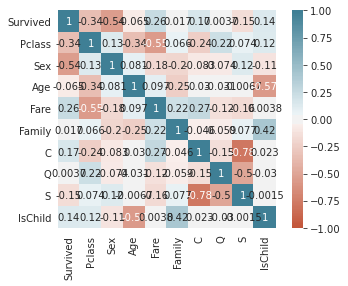

In [30]:
corr = train.corr()
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    annot=True,
    cmap=sns.diverging_palette(20, 222, n=200),
    square=True
)


In [31]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

In [32]:
X_train = train[['Pclass','Sex','Fare','C','IsChild','S']]
y_train = train['Survived']

In [33]:
X_test = test[['Pclass','Sex','Fare','C','IsChild','S']]
X_test['Fare'].astype('float64')

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [34]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

0.9191919191919192

In [36]:
test_ = pd.read_csv('/kaggle/input/titanic/test.csv')
PassId = test_['PassengerId']

In [37]:
submission = pd.DataFrame({
        "PassengerId": PassId,
        "Survived": y_pred
    })
submission.to_csv('titanic.csv', index=False)